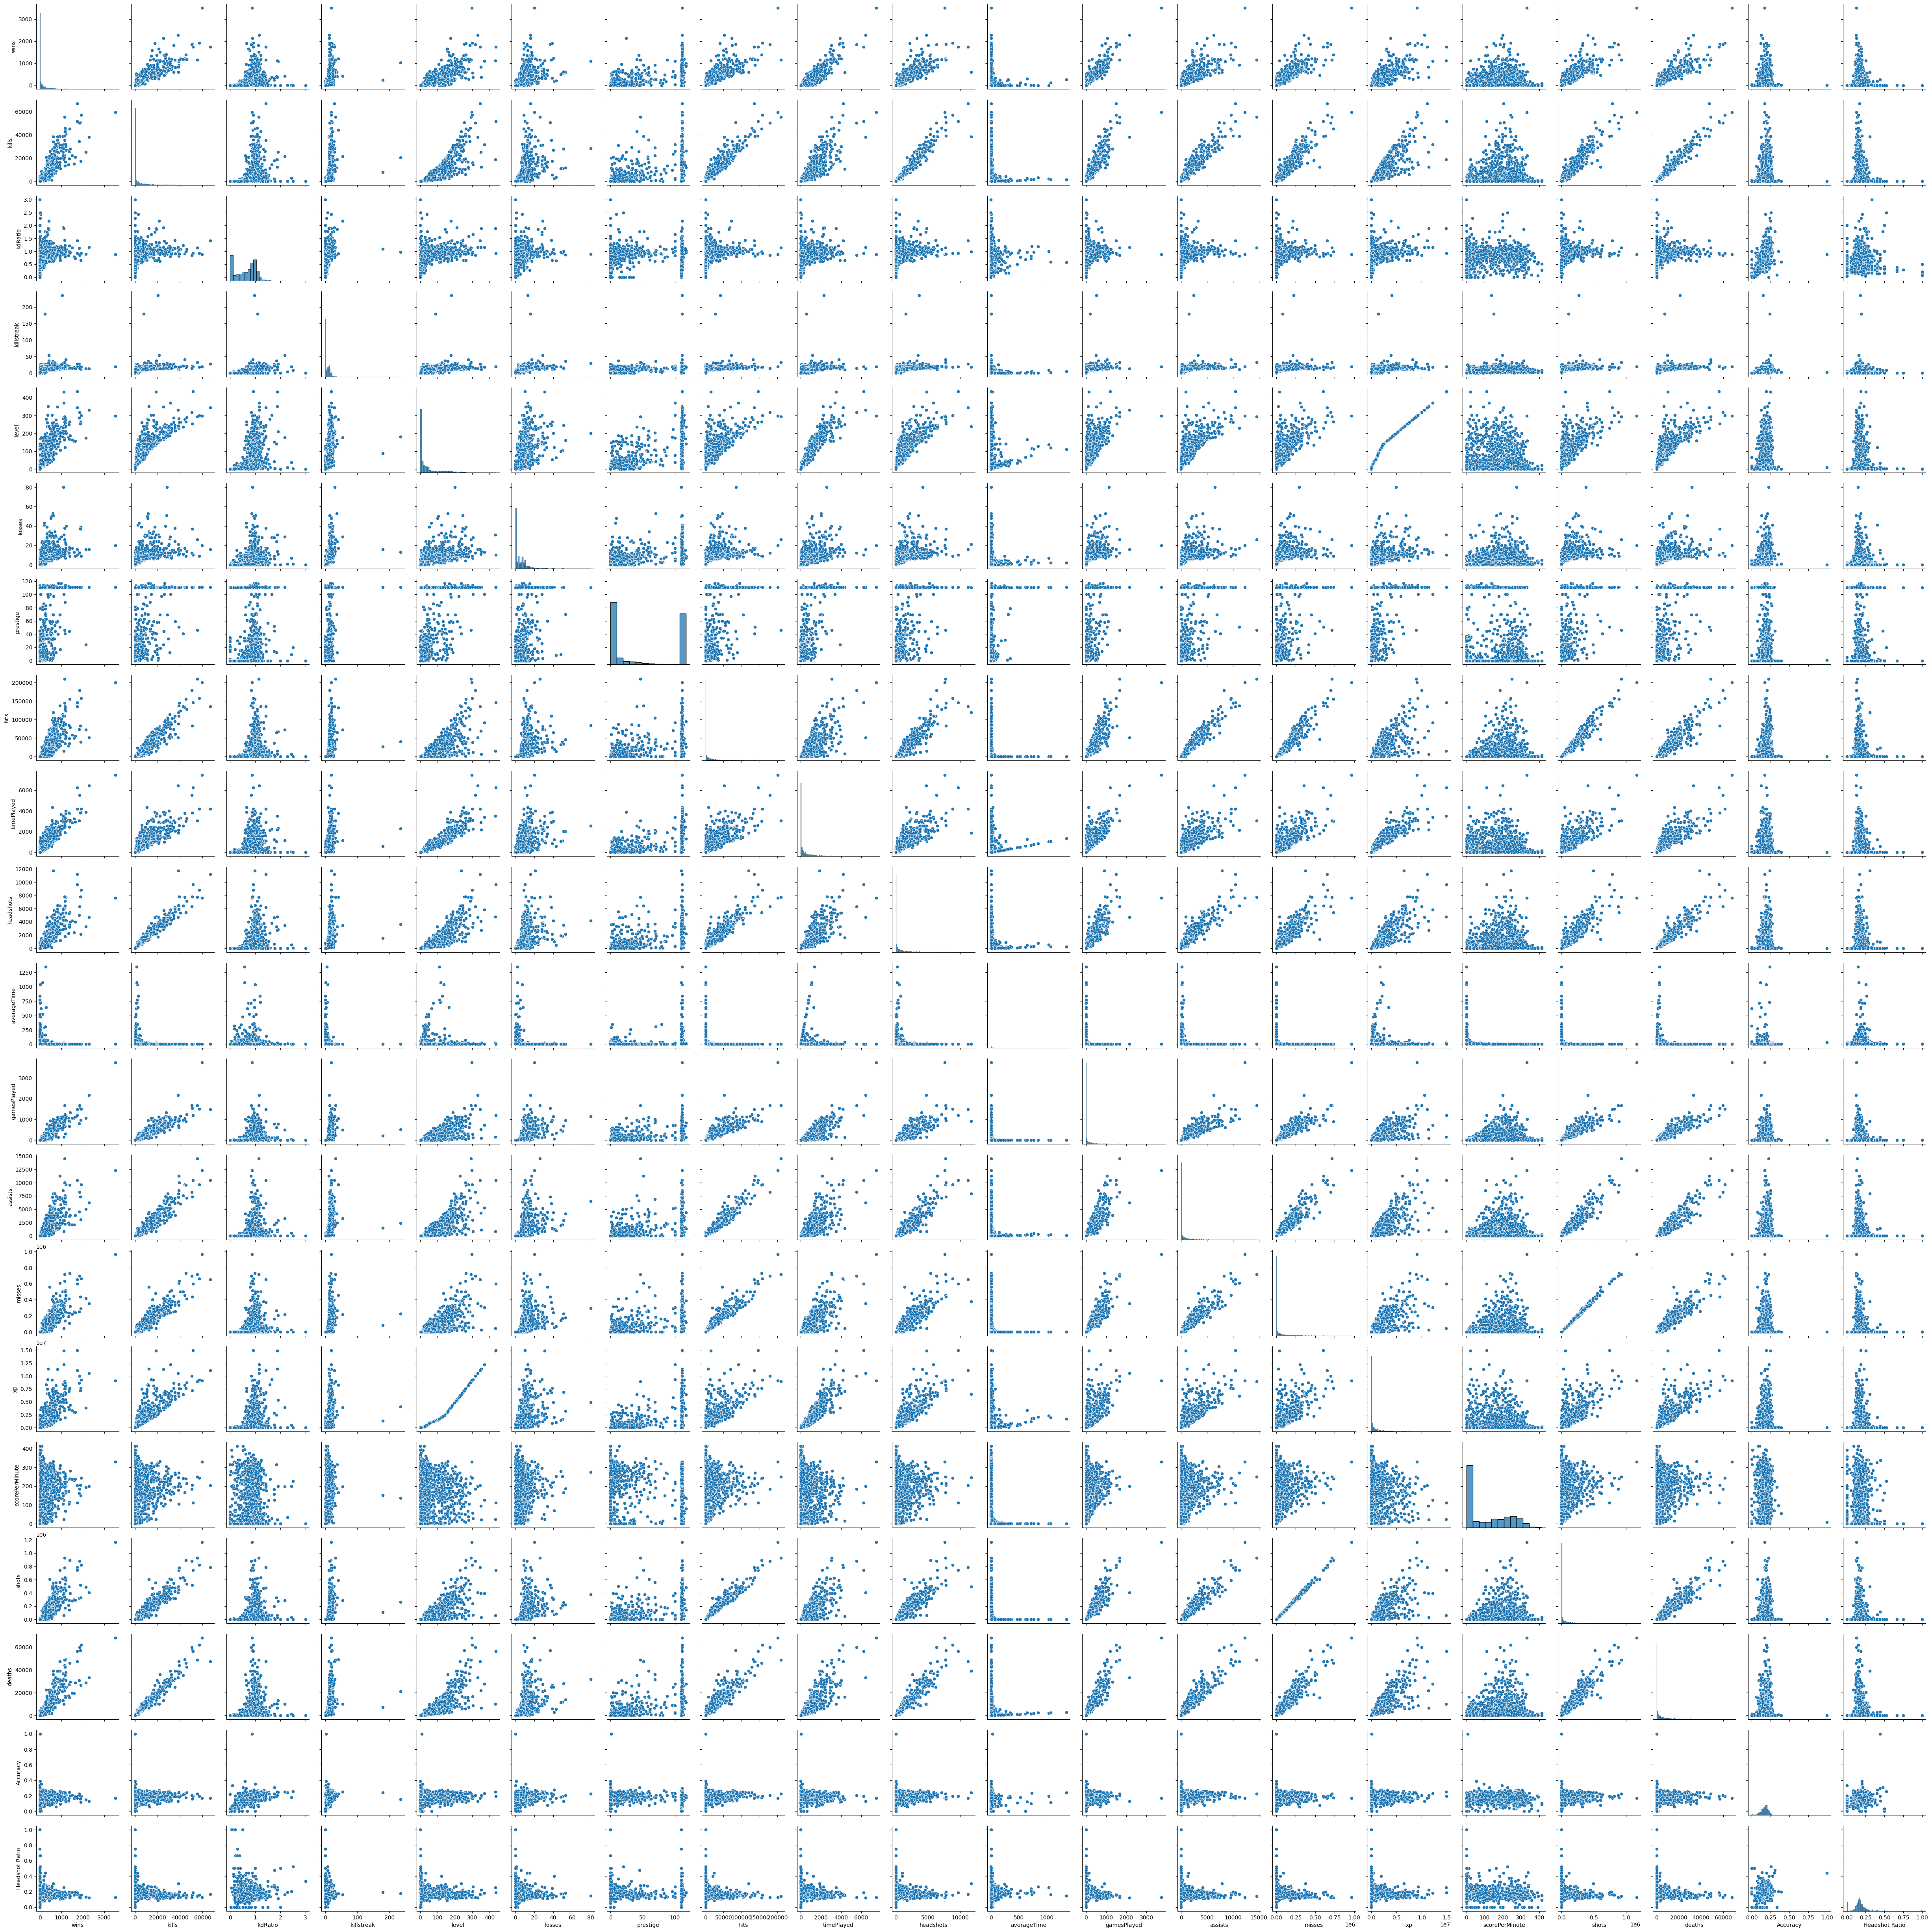

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
cod = pd.read_csv("cod.csv")
cod = cod.drop('name', axis=1)

# Calculate Accuracy by dividing hits by shots, handling division by zero
mask = cod['shots'] != 0  
cod.loc[mask, 'Accuracy'] = cod['hits'] / cod['shots']
cod.loc[~mask, 'Accuracy'] = pd.NA  

# Calculate Headshot Ratio by dividing headshots by kills, handling division by zero
mask = cod['kills'] != 0  
cod.loc[mask, 'Headshot Ratio'] = cod['headshots'] / cod['kills']
cod.loc[~mask, 'Headshot Ratio'] = pd.NA  

# Plot
sns.pairplot(cod)
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load data
cod = pd.read_csv("cod.csv")
cod = cod.drop('name', axis=1)

# Calculate Accuracy by dividing hits by shots, handling division by zero
mask = cod['shots'] != 0  
cod.loc[mask, 'Accuracy'] = cod['hits'] / cod['shots']
cod.loc[~mask, 'Accuracy'] = pd.NA  

# Calculate Headshot Ratio by dividing headshots by kills, handling division by zero
mask = cod['kills'] != 0  
cod.loc[mask, 'Headshot Ratio'] = cod['headshots'] / cod['kills']
cod.loc[~mask, 'Headshot Ratio'] = pd.NA  

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cod['gamesPlayed'].quantile(0.25)
Q3 = cod['gamesPlayed'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where data points are outside the bounds
cod = cod[(cod['gamesPlayed'] >= lower_bound) & (cod['gamesPlayed'] <= upper_bound)]
cod = cod[cod['gamesPlayed'] != 0]

X = cod.drop('wins', axis=1)
y = cod['wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Training R-squared: {r_squared_train}")
print(f"Testing R-squared: {r_squared_test}")

print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Testing Root Mean Squared Error (RMSE): {rmse_test}")

Training R-squared: 0.8128800624929668
Testing R-squared: 0.8131510148934943
Training Root Mean Squared Error (RMSE): 63.32559611320688
Testing Root Mean Squared Error (RMSE): 49.962026279270376


c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
# Get the trained linear regression model from the pipeline
linear_regression_model = pipeline.named_steps['regressor']

# Get coefficients and intercept
coefficients = linear_regression_model.coef_
intercept = linear_regression_model.intercept_

# Print coefficients
print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i}: {coef}")

# Print intercept
print("Intercept:", intercept)

Coefficients:
Feature 0: 56.057460807664164
Feature 1: -6.065568911225817
Feature 2: 0.7275660914682035
Feature 3: -44.897469302744824
Feature 4: -1.5237427622161177
Feature 5: -2.738227028636402
Feature 6: -3414.979747807147
Feature 7: 94.56702020802754
Feature 8: 14.21040310344506
Feature 9: -3.576990428817783
Feature 10: 47.31264143803287
Feature 11: -34.539986775926764
Feature 12: -15108.671850765126
Feature 13: 4.01839358589198
Feature 14: -13.282893137987742
Feature 15: 18423.04484186624
Feature 16: -7.664257632715272
Feature 17: 4.546056448520891
Feature 18: -1.699910706344291
Intercept: 119.27027027027175


In [6]:
# Get column names after preprocessing
numeric_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['scaler'].get_feature_names_out(input_features=numeric_features)

# Get variable names and coefficients
coefficients_df = pd.DataFrame({'Variable': numeric_feature_names, 'Coefficient': coefficients})

# Print coefficients with variable names
print(coefficients_df)

          Variable   Coefficient
0            kills     56.057461
1          kdRatio     -6.065569
2       killstreak      0.727566
3            level    -44.897469
4           losses     -1.523743
5         prestige     -2.738227
6             hits  -3414.979748
7       timePlayed     94.567020
8        headshots     14.210403
9      averageTime     -3.576990
10     gamesPlayed     47.312641
11         assists    -34.539987
12          misses -15108.671851
13              xp      4.018394
14  scorePerMinute    -13.282893
15           shots  18423.044842
16          deaths     -7.664258
17        Accuracy      4.546056
18  Headshot Ratio     -1.699911


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load data
cod = pd.read_csv("cod.csv")
cod = cod.drop('name', axis=1)

# Calculate Accuracy by dividing hits by shots, handling division by zero
mask = cod['shots'] != 0  
cod.loc[mask, 'Accuracy'] = cod['hits'] / cod['shots']
cod.loc[~mask, 'Accuracy'] = pd.NA  

# Calculate Headshot Ratio by dividing headshots by kills, handling division by zero
mask = cod['kills'] != 0  
cod.loc[mask, 'Headshot Ratio'] = cod['headshots'] / cod['kills']
cod.loc[~mask, 'Headshot Ratio'] = pd.NA  

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = cod['gamesPlayed'].quantile(0.25)
Q3 = cod['gamesPlayed'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where data points are outside the bounds
cod = cod[(cod['gamesPlayed'] >= lower_bound) & (cod['gamesPlayed'] <= upper_bound)]
cod = cod[cod['gamesPlayed'] != 0]

X = cod.drop('wins', axis=1)
y = cod['wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Neural Network Model
mlp_regressor = MLPRegressor()

# GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', grid_search)])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate MSE
# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Testing Root Mean Squared Error (RMSE): {rmse_test}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Training Root Mean Squared Error (RMSE): 31.50942992576519
Testing Root Mean Squared Error (RMSE): 49.91216918339932


c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\camer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
best_params = pipeline.named_steps['regressor'].best_params_
print("Best Hyperparameter Values:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameter Values:
activation: tanh
alpha: 0.01
hidden_layer_sizes: (100,)
learning_rate: adaptive
solver: sgd
